# Simple Exploratory Data Analysis on Employee Salaries in 2022


data can be downloaded from [here](https://catalog.data.gov/dataset/employee-salaries-2022)


## Import Libraries


In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, f
from statsmodels.stats.weightstats import ztest

## Data Overview


In [3]:
df = pd.read_csv("Employee_Salaries_-_2022.csv")
df.head()

,Department,Department_Name,Division,Gender,Base Salary,Overtime Pay,Longevity Pay,Grade
0,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,M,142100.00,NaN,NaN,N35
1,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,162000.00,NaN,NaN,N35
2,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,93895.00,NaN,NaN,N21
3,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,77179.61,NaN,NaN,N18
4,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,196631.58,NaN,NaN,NaN


## Descriptive statistics Analysis


### 1. How much base salary's mean?


In [123]:
df["Base Salary"].mean()

85503.27920911263

### 2. How much base salary's variance


In [124]:
df["Base Salary"].var()

939656517.4438535

### 3. How much base salary's standard deviation


In [125]:
df["Base Salary"].std()

30653.817338854446

### 4. Which one is more, male or female?


create function to draw barh chart


In [155]:
def draw_barh_chart(df, title, xlabel, ylabel):
    ax = df.plot(kind="barh", color="c")
    ax.set_title(title, y=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    for i, v in enumerate(df):
        ax.annotate(
            str(round(v, 2)),
            xy=(v, i),
            va="center",
            xytext=(5, 0),
            textcoords="offset points",
        )

    ax.set_xlim([0, df.max() * 1.25])

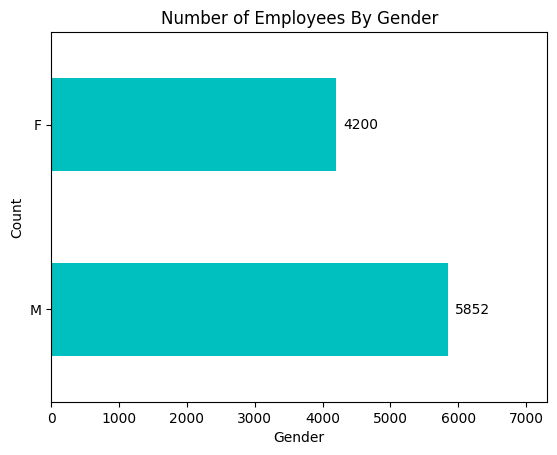

In [158]:
gender_counts = df["Gender"].value_counts().sort_values(ascending=False)

draw_barh_chart(
    gender_counts, "Number of Employees By Gender", "Gender", "Count"
)

### 5. Is the average base salary of male and female the same?


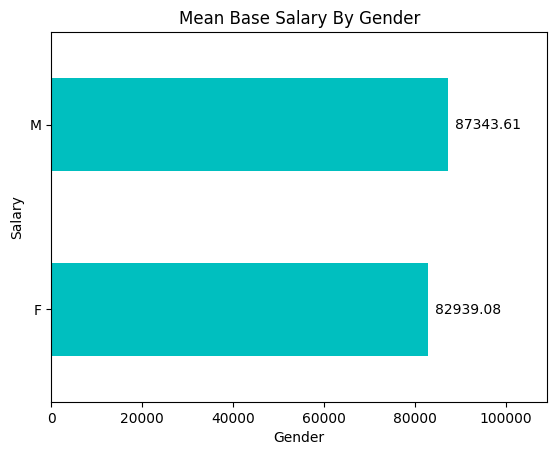

In [157]:
gender_salary = df.groupby("Gender")["Base Salary"].mean()

draw_barh_chart(
    gender_salary, "Mean Base Salary By Gender", "Gender", "Salary"
)

## Discrete Variables Analysis


### 1. Which department has the highest number of employees?


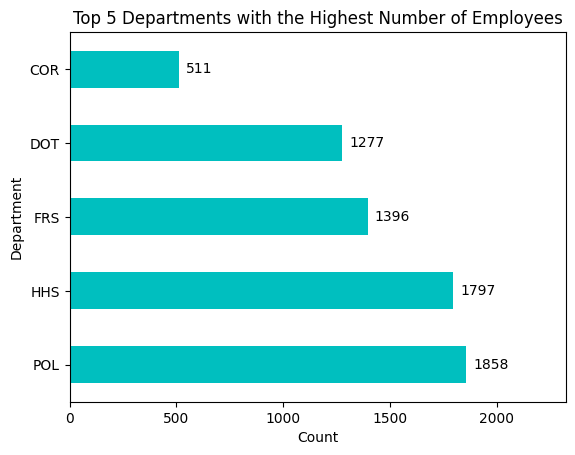

In [164]:
dept_count = (
    df.groupby("Department")["Base Salary"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)

draw_barh_chart(
    dept_count,
    "Top 5 Departments with the Highest Number of Employees",
    "Count",
    "Department",
)

### 2. Which department has the highest mean base salary?


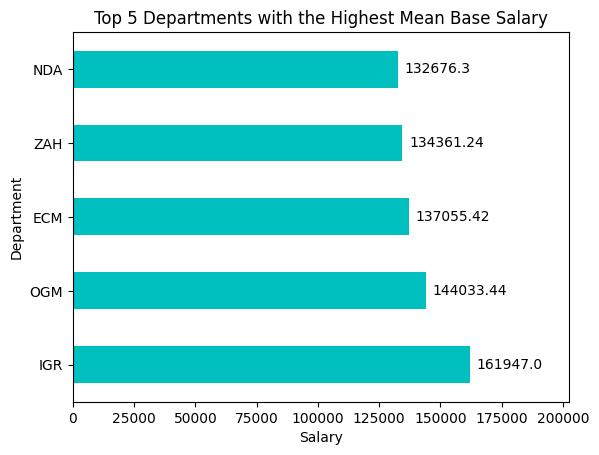

In [162]:
dept_salary = (
    df.groupby("Department")["Base Salary"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

draw_barh_chart(
    dept_salary,
    "Top 5 Departments with the Highest Mean Base Salary",
    "Salary",
    "Department",
)

### 3. How is the distribution of employees by Gender in every departments?


create function to draw heatmap


In [169]:
def draw_heatmap(df):
    fig, ax = plt.subplots(figsize=(10, 10))  # Sample figsize in inches
    sns.heatmap(
        df,
        annot=True,
        fmt=".1f",
        linewidth=0.5,
        cmap="crest",
        ax=ax,
    )

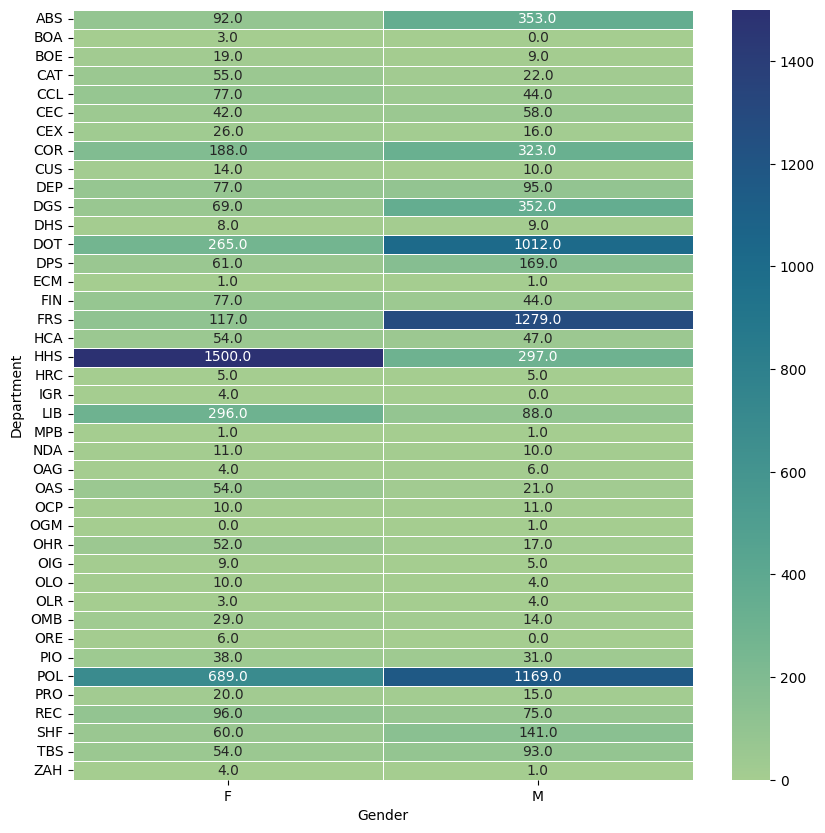

In [171]:
draw_heatmap(pd.crosstab(df["Department"], df["Gender"]))

### 4. What is probability of female given that working in Department HHS (Health and Human Service)


$$
P(F|HHS)=\frac{P(F \bigcap HHS)}{P(HHS)}\ \\
P(F|HHS)=\frac{n(F \bigcap HHS)}{n(HHS)}\ \\
P(F|HHS)=\frac{1500}{1797}\ \\


$$


In [177]:
1500 / 1797

0.8347245409015025

### 5. What is probability of police (Department POL) given that gender is male


$$
P(POL|M)=\frac{P(POL \bigcap M)}{P(M)}\ \\
P(POL|M)=\frac{n(POL \bigcap M)}{n(M)}\ \\
P(POL|M)=\frac{1169}{5852}\ \\


$$


In [176]:
1169 / 5852

0.19976076555023922

## Continuous Variables Analysis


### 1. What is probability of females get higher salary than average male salary?


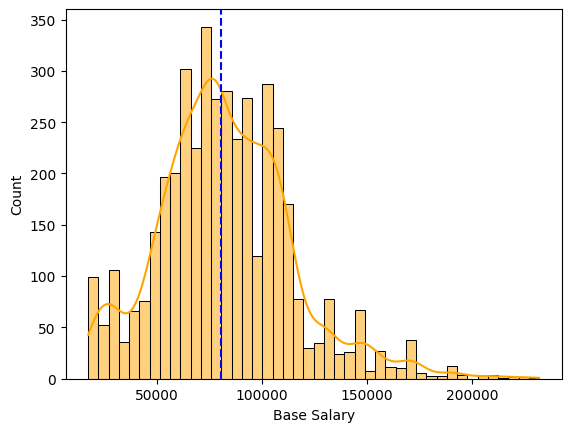

In [38]:
med1 = df[df["Gender"] == "F"]["Base Salary"].median()
sns.histplot(
    data=df[df["Gender"] == "F"], x="Base Salary", kde=True, color="orange"
)
plt.axvline(x=med1, color="blue", linestyle="--")
plt.show()

In [25]:
x1 = 87343.610034
mean1 = df[df["Gender"] == "F"]["Base Salary"].mean()
std1 = df[df["Gender"] == "F"]["Base Salary"].std()
P1 = 1 - norm.cdf(x1, mean1, std1)
P1

0.44517957306108735

### 2. What is probability of females who is working in Department HHS get higher salary than males who is working in Department HHS?


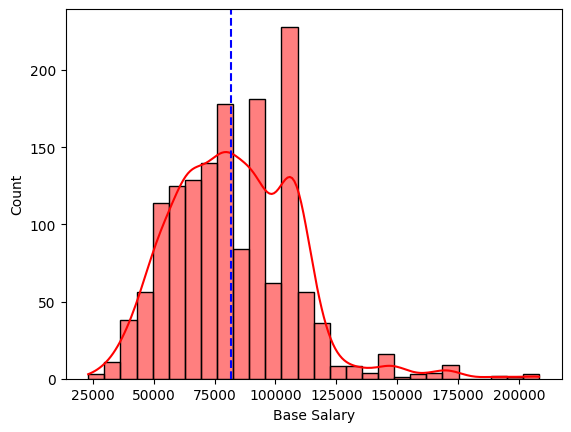

In [37]:
med2 = df[(df["Gender"] == "F") & (df["Department"] == "HHS")][
    "Base Salary"
].median()
sns.histplot(
    data=df[(df["Gender"] == "F") & (df["Department"] == "HHS")],
    x="Base Salary",
    kde=True,
    color="red",
)
plt.axvline(x=med2, color="blue", linestyle="--")
plt.show()

In [185]:
x2 = df[(df["Gender"] == "M") & (df["Department"] == "HHS")][
    "Base Salary"
].mean()
mean2 = df[(df["Gender"] == "F") & (df["Department"] == "HHS")][
    "Base Salary"
].mean()
std2 = df[(df["Gender"] == "F") & (df["Department"] == "HHS")][
    "Base Salary"
].std()
P2 = 1 - norm.cdf(x2, mean2, std2)
P2

0.3833506985707994

## Variables Correlation Analysis


### 1. Is there any correlation between number of people in department with average of salary on each departments?


In [197]:
df_grouped = (
    df.groupby("Department")
    .agg({"Department": "count", "Base Salary": "mean"})
    .rename(columns={"Department": "Count", "Base Salary": "Mean"})
    .reset_index()
    .drop(columns="Department")
)

df_grouped.head()

,Count,Mean
0,445,60099.955124
1,3,99310.826667
2,28,85404.735714
3,77,123602.655325
4,121,106403.615537


Text(0, 0.5, 'Mean')

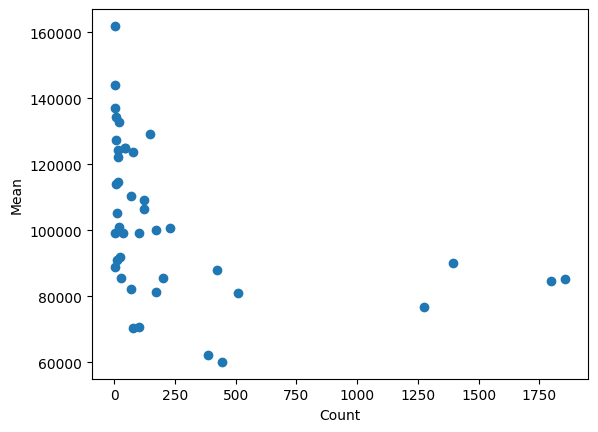

In [198]:
plt.scatter(df_grouped["Count"], df_grouped["Mean"])
plt.xlabel("Count")
plt.ylabel("Mean")

In [199]:
def heatmap_correlation(corr):
    sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

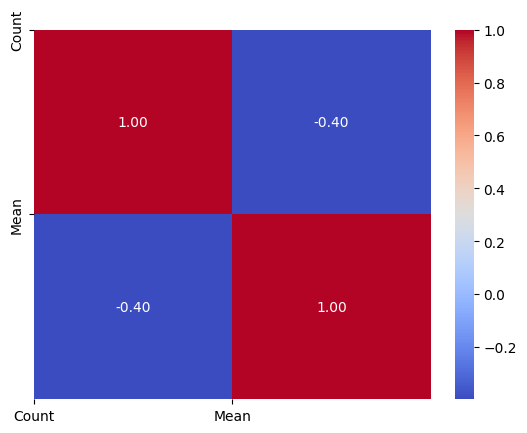

In [200]:
corr1 = df_grouped[["Count", "Mean"]].corr()

heatmap_correlation(corr1)

**Correlation of number of people and average salary is weak**


### 2. Is there any correlation between base salary and longetivity salary


check null data


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10052 non-null  object 
 1   Department_Name  10052 non-null  object 
 2   Division         10052 non-null  object 
 3   Gender           10052 non-null  object 
 4   Base Salary      10052 non-null  float64
 5   Overtime Pay     5786 non-null   float64
 6   Longevity Pay    2399 non-null   float64
 7   Grade            10013 non-null  object 
dtypes: float64(3), object(5)
memory usage: 628.4+ KB


In [212]:
df3 = df[df["Longevity Pay"].isna() == False][["Base Salary", "Longevity Pay"]]

df3.head()

,Base Salary,Longevity Pay
23,130167.0,2588.8
24,130167.0,2588.8
36,130167.0,2588.8
37,130167.0,2588.8
38,130167.0,2588.8


Text(0, 0.5, 'Longevity Pay')

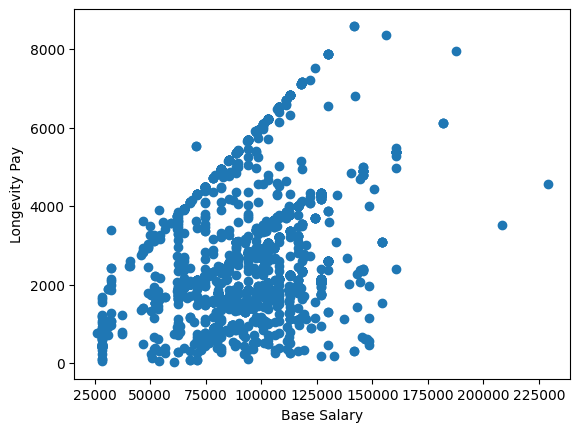

In [213]:
plt.scatter(df3["Base Salary"], df3["Longevity Pay"])
plt.xlabel("Base Salary")
plt.ylabel("Longevity Pay")

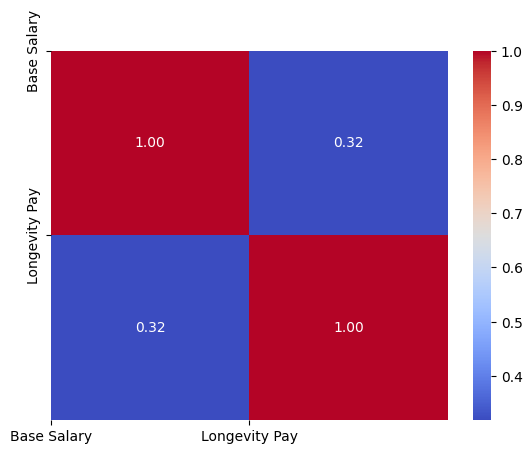

In [214]:
corr2 = df3[["Base Salary", "Longevity Pay"]].corr()

heatmap_correlation(corr2)

## Hypothesis testing


### 1. Average base salary of females is the same as the average base salary of males


$$H_0: \mu_{F} = \mu_{M}$$
$$H_1: \mu_{F} \not= \mu_{M}$$


In [115]:
alpha = 0.05

In [114]:
z_score1, p_value1 = ztest(
    df[df["Gender"] == "F"]["Base Salary"],
    df[df["Gender"] == "M"]["Base Salary"],
    value=0,
    alternative="two-sided",
)

z_score1, p_value1

(-7.122572124138132, 1.0593128762341356e-12)

In [215]:
# Decision Making
if p_value1 > alpha:
    print("Fail to reject H0")
else:
    print("Reject H0")

Reject H0


### 2. Average of base salary of females is lower than males


$$H_0: \mu_{F} = \mu_{M}$$
$$H_1: \mu_{F} < \mu_{M}$$


In [120]:
z_score2, p_value2 = ztest(
    df[df["Gender"] == "F"]["Base Salary"],
    df[df["Gender"] == "M"]["Base Salary"],
    value=0,
    alternative="smaller",
)

z_score2, p_value2

(-7.122572124138132, 5.296564381170678e-13)

In [216]:
# Decision Making
if p_value2 > alpha:
    print("Fail to reject H0")
else:
    print("Reject H0")

Reject H0


### 3. Variance of base salary between females and males is the same


$$ H_0 : \sigma_F^2 = \sigma_M^2$$
$$ H_a : \sigma_F^2 \neq \sigma_M^2$$


In [225]:
def f_test(group1, group2):
    nun = np.array(group1).size - 1
    dun = np.array(group2).size - 1

    x = np.var(group1, ddof=1) / np.var(group2, ddof=1)

    p_value = 1 - f.cdf(x, nun, dun)  # f is method of scipy.stats
    return x, p_value

In [226]:
z_score3, p_value3 = f_test(
    df[df["Gender"] == "F"]["Base Salary"],
    df[df["Gender"] == "M"]["Base Salary"],
)

z_score3, p_value3

(1.1688875119326863, 2.153120559622579e-08)

In [227]:
# Decision Making
if p_value3 > alpha:
    print("Fail to reject H0")
else:
    print("Reject H0")

Reject H0
